In [1]:
# Library Import

import os
import sys


In [2]:
%pwd

'f:\\My_Design\\Data_Science\\Data Science\\Data Science Notes\\Machine Learning\\Projects\\End-to-End Projects\\End-to-End-Machine-Learning-Project-with-Deployment\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'f:\\My_Design\\Data_Science\\Data Science\\Data Science Notes\\Machine Learning\\Projects\\End-to-End Projects\\End-to-End-Machine-Learning-Project-with-Deployment'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv("artifacts/data_ingestion/winequality-red.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### We are not doing the EDA
We are not doing the EDA, as this is still not required for time being. Thats why we took the clean data set.
Our main focus here is to create the pipeline.

In [12]:
data.shape

(1599, 12)

In [17]:
data.columns
data.columns = data.columns.str.replace(" ", "_")

In [19]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

C:\Users\KUNAL\AppData\Local\Temp\ipykernel_21176\719160808.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="quality", palette="Set2", order=data["quality"].value_counts().index)


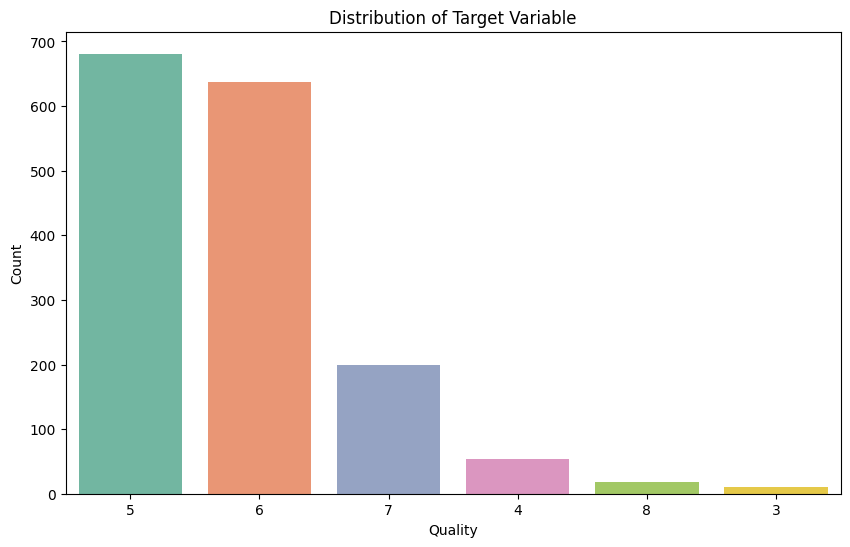

In [24]:
# Lets see the distribution of the target variable

plt.figure(figsize=(10, 6))
plt.title("Distribution of Target Variable")
plt.xlabel("Quality")
plt.ylabel("Count")
sns.countplot(data=data, x="quality", palette="Set2", order=data["quality"].value_counts().index)
plt.show()

In [ ]:
# Perparing the data validation entities [config_entity]

from dataclasses import dataclass
from pathlib import Path

# Below is the data class for data Validation configuration
# This class is used to define the configuration for data Validation in a machine learning pipeline.
@dataclass(frozen=True)
class DataValidationConfig:
    """Data Validation Configuration"""
    # Define the attributes of the class
    root_dir: Path
    unzip_data_dir: Path
    STATUS_FILE: Path
    all_schema: dict # Define the schema for the data validation

In [27]:
from ml_project.constants import *
from ml_project.utils.common import read_yaml, create_directories

In [36]:
class ConfigurationManager:
    """Configuration Manager"""
    def __init__(
        self, 
        config_filepath = CONFIG_FILE_PATH, 
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        """Initialize Configuration Manager"""
        # Initialize the ConfigurationManager with file paths for configuration, parameters, and schema.
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)



        # Create directories for artifacts and data ingestion
        create_directories([self.config.artifacts_root])  # Create the artifacts root directory

    def get_data_validation_config(self) -> DataValidationConfig:
        """Get Data Validation Configuration"""
        config = self.config.data_validation
        schema = self.schema.COLUMNS
        create_directories([config.root_dir])  # Create the data ingestion root directory

        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            unzip_data_dir=config.unzip_data_dir,
            STATUS_FILE=config.STATUS_FILE,
            all_schema=schema,
        )
        return data_validation_config

In [29]:
# Now creating the components for data validation.

import os
from ml_project import logger

In [77]:
class DataValidation:
    """Data Validation"""
    def __init__(self, config: DataValidationConfig):
        """Initialize Data Validation"""
        self.config = config


    def validate_all_columns(self) -> bool:
        try:
            validation_status = True

            data = pd.read_csv(self.config.unzip_data_dir)
            all_columns = list(data.columns)

            all_schema_key = self.config.all_schema.keys()

            for column in all_columns:
                if column not in all_schema_key:
                    validation_status = False
                    with open(self.config.STATUS_FILE, "w") as f:
                        f.write(f"Column {column} is not in the schema\n")
                else:
                    actual_dtypes = data.dtypes.apply(lambda x: x.name).to_dict()
                    expected_dtypes = self.config.all_schema

                    if actual_dtypes != expected_dtypes:
                        validation_status = False
                        with open(self.config.STATUS_FILE, "w") as f:
                            f.write(f"Column {column} data type mismatch: expected {expected_dtypes}, got {actual_dtypes}\n")
                    else:
                        validation_status = True
                        with open(self.config.STATUS_FILE, "w") as f:
                            f.write(f"All necessary columns are in the schema and data type matches\n")

            return validation_status

        except Exception as e:
            raise e         

In [81]:
try:
    """from ml_project import logger
    from ml_project.config.configuration import ConfigurationManager
    from ml_project.components.data_ingestion import DataIngestion"""

    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValidation(data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2025-05-01 15:53:23,842: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-05-01 15:53:23,846: INFO: common: yaml file: params.yaml loaded successfully]
[2025-05-01 15:53:23,854: INFO: common: yaml file: schema.yaml loaded successfully]
[2025-05-01 15:53:23,855: INFO: common: created directory at: artifacts]
[2025-05-01 15:53:23,857: INFO: common: created directory at: artifacts/data_validation]
